In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

This notebook inspect the data logged to **A_dorian_bpm100_00_motion.csv**.

In [23]:
data_path = "renderEphiamples/A_dorian_bpm100_00_motion.csv"

In [24]:
df = pd.read_csv(data_path, index_col=0)

In [25]:
df.head()

,ticks,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,r,theta,phi
b4774b2f-9828-4afe-ba1b-f50c90915f59,19603,95,287,991,-600,300,-300,-73,-195,-375,1036.09,16.97,71.68
f87b29e8-f33b-4eae-8c56-188c7de94e52,19622,94,289,991,-900,600,0,-70,-192,-372,1036.55,17.05,71.98
4758d505-1495-4eda-b52c-6525e5061f83,19641,96,291,992,-800,200,0,-66,-195,-387,1038.25,17.17,71.74
c025c7bb-9044-4529-a278-7f098bedc5e9,19659,96,288,991,-900,200,0,-73,-207,-380,1036.46,17.03,71.57
61ace984-cb04-4f51-ad47-8f41af946378,19678,95,289,988,-800,200,0,-78,-195,-386,1033.77,17.11,71.80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677 entries, b4774b2f-9828-4afe-ba1b-f50c90915f59 to 0543db73-2bda-488e-86f2-1ea06ff17180
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticks   677 non-null    int64  
 1   acc_x   677 non-null    int64  
 2   acc_y   677 non-null    int64  
 3   acc_z   677 non-null    int64  
 4   gyr_x   677 non-null    int64  
 5   gyr_y   677 non-null    int64  
 6   gyr_z   677 non-null    int64  
 7   mag_x   677 non-null    int64  
 8   mag_y   677 non-null    int64  
 9   mag_z   677 non-null    int64  
 10  r       677 non-null    float64
 11  theta   677 non-null    float64
 12  phi     677 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 74.0+ KB


In [16]:
print(df.isnull().sum())

ticks    0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
r        0
theta    0
phi      0
dtype: int64


Now that the data has been confirmed as valid, we are ready to move on to the next step. The current dataset has 12 features, for our purposes we do not want to use all of these features for our model training. Rather, **we want to choose those features that most directly influence the result**. To simplify this, we first usethe `corr()` function. The `corr()` function computes the pairwise correlation of columns:


In [17]:
corr = df.corr()
print(corr)

          ticks     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
ticks  1.000000 -0.060887  0.038376  0.035848 -0.014206  0.057105 -0.005848   
acc_x -0.060887  1.000000 -0.051086  0.042252  0.083262  0.005255  0.001624   
acc_y  0.038376 -0.051086  1.000000  0.061457 -0.033205  0.053376 -0.052619   
acc_z  0.035848  0.042252  0.061457  1.000000 -0.090369  0.045514  0.009152   
gyr_x -0.014206  0.083262 -0.033205 -0.090369  1.000000  0.109799 -0.129988   
gyr_y  0.057105  0.005255  0.053376  0.045514  0.109799  1.000000 -0.029918   
gyr_z -0.005848  0.001624 -0.052619  0.009152 -0.129988 -0.029918  1.000000   
mag_x -0.039108 -0.065360 -0.410044 -0.235199  0.001862 -0.068833  0.031205   
mag_y  0.134404 -0.544599 -0.000870 -0.012616  0.123607  0.046232 -0.046217   
mag_z  0.030779 -0.047972  0.114888 -0.661749  0.020872  0.010370  0.027743   
r     -0.035056  0.019349 -0.146211 -0.091662  0.045941  0.040297  0.010301   
theta -0.000136 -0.056503 -0.089391 -0.892630  0.046

A _positive correlation_ is a relationship between two variables in which both variables move in tandem. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other variable increases. Similarly, a _negative correlation_ is a relationship between two variables in which one variable increases as the other decreases. A perfect negative correlation is represented by the value –1.00: a 0.00 indicates no correlation and a +1.00 indicates a perfect positive correlation.

We have started with the assumption that _r, theta, phi_, had the highest likelihood of having meaninful correlations. Beginning with _r_, we will look for the features that have the highest correlation with that feature. First, we are going to look for correlations with _r_.

In [6]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'r').index)
print(df.corr().abs().nlargest(3, 'r').values[:,12])

Index(['r', 'theta', 'mag_z'], dtype='object')
[0.05614075 0.15063412 0.02646793]


In the case of _r_, a high correlation exists between _r_ and the theta and mag_z features. Having determined the two features with the highest correlation with _r_ are _theta_ and _mag_z_. We plot each against _r_. Starting with _theta, we see the following plot of _r_ versus _theta_. 

Text(0, 0.5, 'theta')

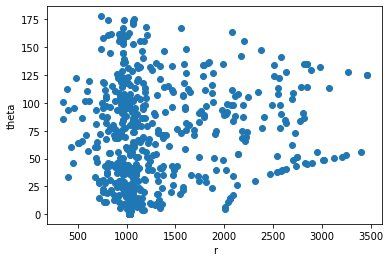

In [7]:
%matplotlib inline

plt.scatter(df['r'], df['theta'], marker='o')
plt.xlabel('r')
plt.ylabel('theta')

Text(0, 0.5, 'mag_z')

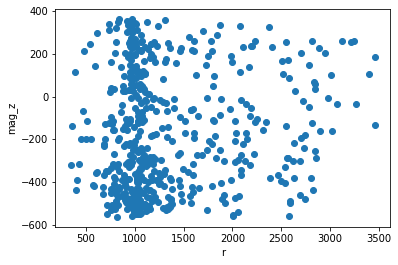

In [40]:
%matplotlib inline

plt.scatter(df['r'], df['mag_z'], marker='o')
plt.xlabel('r')
plt.ylabel('mag_z')

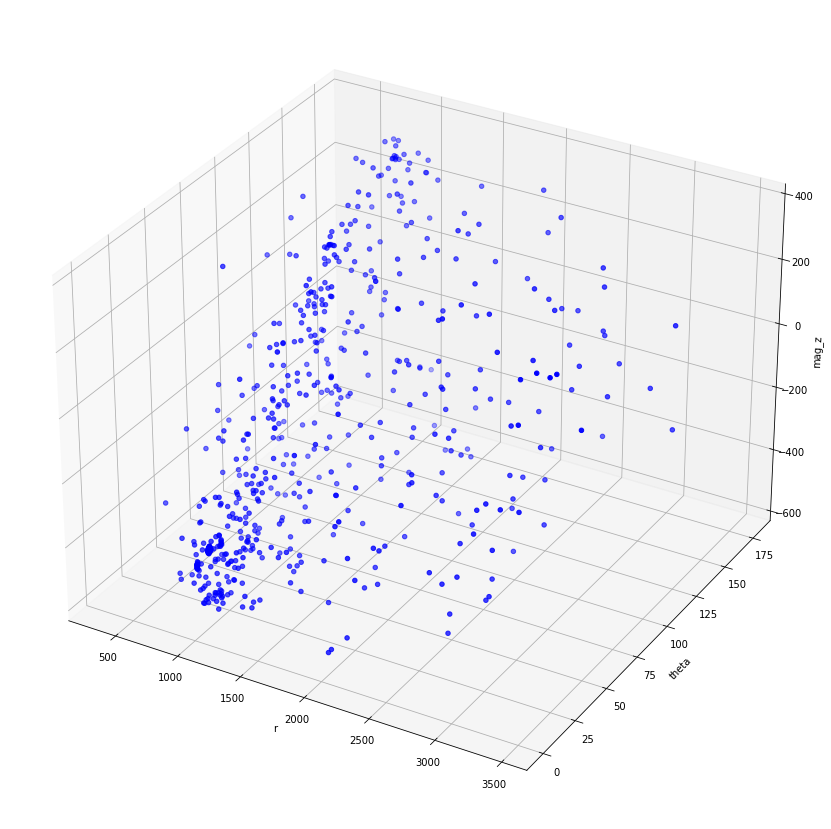

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['r'],
           df['theta'],
           df['mag_z'],
           c='b')

ax.set_xlabel("r")
ax.set_ylabel("theta")
ax.set_zlabel("mag_z")
plt.show()


In [11]:
print(df.corr().abs().nlargest(3, 'acc_x').index)
print(df.corr().abs().nlargest(3, 'acc_x').values[:,12])

Index(['acc_x', 'mag_y', 'gyr_x'], dtype='object')
[0.00479437 0.0258725  0.00289087]


In [36]:
print(df.corr().abs().nlargest(3, 'theta').index)
print(df.corr().abs().nlargest(3, 'theta').values[:,12])

Index(['theta', 'acc_z', 'mag_z'], dtype='object')
[0.15063412 0.13560666 0.02646793]


Text(0, 0.5, 'acc_z')

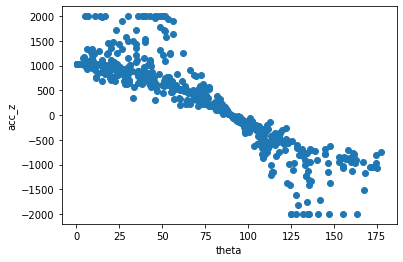

In [47]:
%matplotlib inline

plt.scatter(df['theta'], df['acc_z'], marker='o')
plt.xlabel('theta')
plt.ylabel('acc_z')

Text(0, 0.5, 'mag_z')

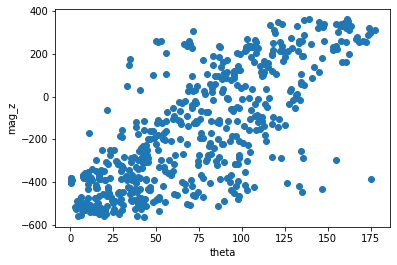

In [42]:
%matplotlib inline

plt.scatter(df['theta'], df['mag_z'], marker='o')
plt.xlabel('theta')
plt.ylabel('mag_z')

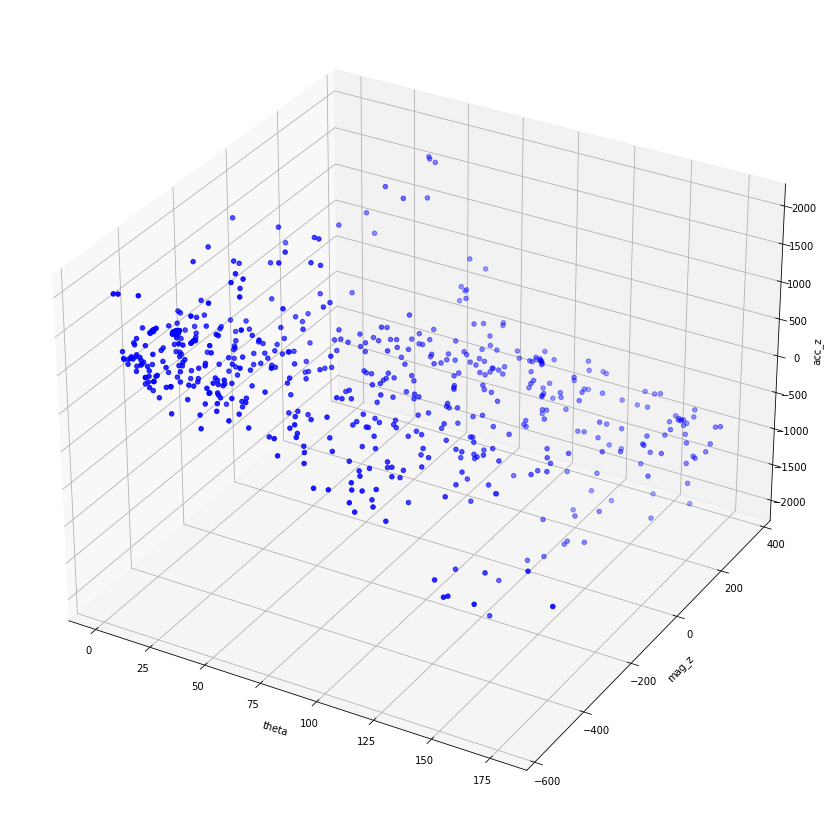

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['theta'],
           df['acc_z'],
           df['mag_z'],
           c='b')

ax.set_xlabel("theta")
ax.set_ylabel("acc_z")
ax.set_zlabel("mag_z")
plt.show()


In [37]:
print(df.corr().abs().nlargest(3, 'phi').index)
print(df.corr().abs().nlargest(3, 'phi').values[:,12])

Index(['phi', 'acc_y', 'mag_x'], dtype='object')
[1.         0.55662038 0.45546074]


Text(0, 0.5, 'acc_y')

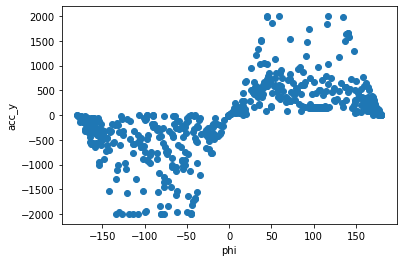

In [38]:
%matplotlib inline

plt.scatter(df['phi'], df['acc_y'], marker='o')
plt.xlabel('phi')
plt.ylabel('acc_y')

Text(0, 0.5, 'acc_x')

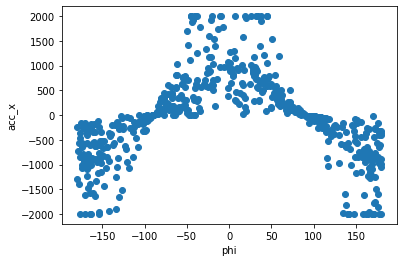

In [43]:
%matplotlib inline

plt.scatter(df['phi'], df['acc_x'], marker='o')
plt.xlabel('phi')
plt.ylabel('acc_x')

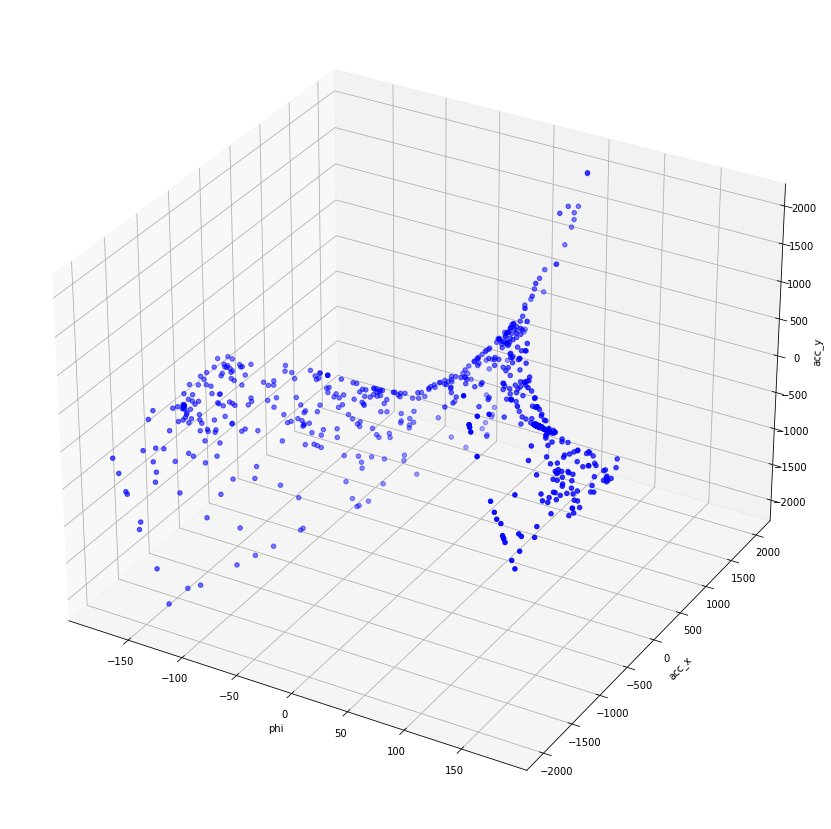

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['phi'],
           df['acc_x'],
           df['acc_y'],
           c='b')

ax.set_xlabel("phi")
ax.set_ylabel("acc_x")
ax.set_zlabel("acc_y")
plt.show()

In [13]:
x = pd.DataFrame(np.c_[df['acc_x'], df['acc_y']], columns = ['acc_x','acc_y'])
Y = df['phi']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)

In [15]:
print(x_train.shape)
print(Y_train.shape)

(473, 2)
(473,)


In [16]:
print(x_test.shape)
print(Y_test.shape)

(204, 2)
(204,)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [18]:
phi_pred = model.predict(x_test)

In [19]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.2983


8370.151854544512


Text(0.5, 1.0, 'Actual Phi vs Predicted Phi')

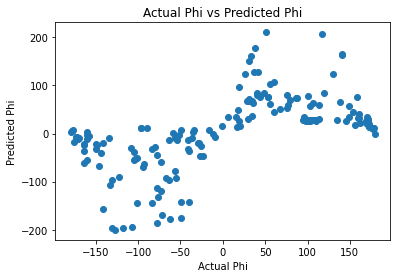

In [20]:
#%%

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, phi_pred)
print(mse)

plt.scatter(Y_test, phi_pred)
plt.xlabel("Actual Phi")
plt.ylabel("Predicted Phi")
plt.title("Actual Phi vs Predicted Phi")

/tmp/ipykernel_256037/3352854909.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  phi = df.phi[:, np.newaxis]     #---convert to 2D array---
/tmp/ipykernel_256037/3352854909.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = df.acc_y[:,  np.newaxis]     #---convert to 2D array---


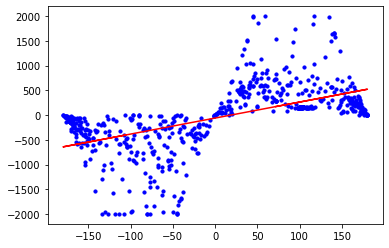

R-squared for training set: 0.3098


In [39]:
model = LinearRegression()

phi = df.phi[:, np.newaxis]     #---convert to 2D array---
y = df.acc_y[:,  np.newaxis]     #---convert to 2D array---

model.fit(phi,y)

#---perform prediction---
y_pred = model.predict(phi)

#---plot the training points---
plt.scatter(phi, y, s=10, color='b')

#---plot the straight line---
plt.plot(phi, y_pred, color='r')
plt.show()

#---calculate R-squared---
print('R-squared for training set: %.4f' % model.score(phi,y))




A polynomial function of degree 1 has the following form:

Y = β0 + β1x

Quadratic regression is a degree 2 

Y = β0 + β1x + β2x2

For a polynomial of degree 3, the formula is as follows:

Y = β0 + β1x + β2x2 + β3x3

In general, a polynomial of degree n has the formula of:

Y = β0 + β1x + β2x2 + β3x3 + … + βnxn

The idea behind polynomial regression is simple — find the coefficients of the polynomial function that best fits the data.


In [40]:

from sklearn.preprocessing import PolynomialFeatures
degree = 2

polynomial_features = PolynomialFeatures(degree = degree)



In [43]:
phi_poly = polynomial_features.fit_transform(phi)
print(phi_poly)

[[ 1.00000000e+00  7.16800000e+01  5.13802240e+03]
 [ 1.00000000e+00  7.19800000e+01  5.18112040e+03]
 [ 1.00000000e+00  7.17400000e+01  5.14662760e+03]
 ...
 [ 1.00000000e+00 -9.71300000e+01  9.43423690e+03]
 [ 1.00000000e+00 -9.71300000e+01  9.43423690e+03]
 [ 1.00000000e+00 -1.05950000e+02  1.12254025e+04]]


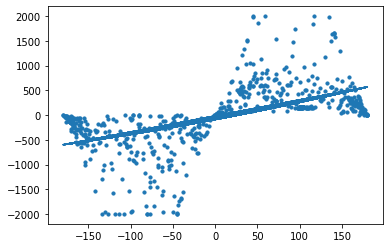

In [44]:

model = LinearRegression()
model.fit(phi_poly, y)
y_poly_pred = model.predict(phi_poly)

#---plot the points---
plt.scatter(phi, y, s=10)

#---plot the regression line---
plt.plot(phi, y_poly_pred)
plt.show()